### Context and Dataset Overview:
Today, the digital landscape is dominated by mobile application, with over 1.85 million different apps available for users to downlaod across various platforms. Android Users have even wider selection, with 2.56 million apps through the Google Play Store. Apps have fundamentally transformed the way we communicate, work, and entertain ourselves making them an essential part of the modern life.

The dataset contains information about app names, categories, ratings, installs, sizes, prices, Android Version and many more.


### Objective Statement:
Our primary objective with the dataset are to:
- Identify the most popular app category
- Determine the app with the largest number of installs
- Gain actionable insights into app popularity and characteristics

### Dataset Description:
- Format: Tabular Data (Rows and Columns)
- Source: Kaggle 
- Features(Columns):13
- Observations(Rows):10,841

In [1]:
#Importing the necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import statsmodels.api as sm
import sys
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [2]:
#Reading the dataset from the csv file:
playstore=pd.read_csv("GooglePlayStore.csv")
playstore.shape

(10841, 13)

In [3]:
playstore.sample(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4296,OST),FAMILY,3.7,4444,10M,"500,000+",Free,0,Everyone,Entertainment,"July 6, 2018",3.0.12,4.1 and up
990,Laugh Out Loud by Kevin Hart,ENTERTAINMENT,4.3,1856,20M,"100,000+",Free,0,Teen,Entertainment,"August 1, 2018",1.6.1,6.0 and up
3857,Radarbot Free: Speed Camera Detector & Speedom...,MAPS_AND_NAVIGATION,4.5,44348,11M,"5,000,000+",Free,0,Everyone,Maps & Navigation,"July 6, 2018",6.2.3,4.1 and up
10722,Launcher Theme for LG K10 2018,PERSONALIZATION,4.0,649,11M,"100,000+",Free,0,Everyone,Personalization,"March 30, 2017",1.0,2.3.3 and up


In [4]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
playstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


The dataset comprises 10,841 observation (rows) and 13 features (columns). Initial inspection reveals a notable distribution in data types: 12 columns are currently classified as categorical variables and only 1 column is labeled as numerical. 

Upon closer examination, several columns- like Reviews, Size, Installs, and Price appear to contain numerical data. However, these features are currently stored as categorical (likely due to formatting issues, missing values, or any inconsistencies). To ensure integrity, I will conduct a detailed exploration of each relevant column.

In [6]:
playstore.isnull().mean()*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

Upon reviewing the dataset, we can observe the following:
- **Rating:** Approximately, 13.6% of the data in `Rating` columns is missing. This is a significant proportion and requires careful consideration for imputation or exclusion.
- **Other Columns(Type, Content Rating, Current Version, and Andriod Version):** Each of these columns contains less than 5% missing values. Since the proportion is relatively low, it is reasonable to consider removing the affected rows.

In [7]:
playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
playstore['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [9]:
#Dropping the column Genres
playstore.drop(columns=['Genres'],inplace=True)

Upon closer inspection of the dataset, I identified that the `Category` and `Genres` columns contain overlapping information regarding the type or classification of apps. While `Genres` column may provide a detailed classification, the `Category` column offers a conscise and standardized categorization that is generally sufficient for most analytical purpose. Thus, I have planned to drop `Genres` column for managing redundant features.

#### Working with the Price feature:

In [10]:
#All the distinct values of price:
playstore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [11]:
playstore['Price']=playstore['Price'].str.replace("$","")

In [12]:
playstore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       'Everyone', '1.20', '1.04'], dtype=object)

In [13]:
playstore[playstore['Price']=="Everyone"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.0.19,4.0 and up,NaN


The observation at index 10472 appears to be left-shifted. This means that the values in several columns (e.g. Category to Android Version) are not correctly aligned with their intended headers. While, it is technically possible to rectify this misalignment by shifting the column to the right, I have decided to just drop it since this observation also consists of numerous null values and does not provide significant or reliable information for analysis.

In [14]:
playstore.drop(index=[10472],inplace=True)

In [15]:
playstore['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [16]:
playstore['Price']=playstore['Price'].astype(float)

In [17]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


#### Working with the Size feature:

In [18]:
playstore['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
def convertSize(val):
    if 'M' in val:
        return float(val.replace('M','')) *1000000
    elif 'k' in val:
        return float(val.replace('k','')) *1000
    else:
        return np.nan

In [20]:
playstore['Size'] =playstore['Size'].apply(convertSize)

In [21]:
playstore['Size']=playstore['Size'].astype(float)

#### Working with the Installs feature:

In [22]:
playstore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [23]:
playstore['Installs']=playstore['Installs'].str.replace('+','')
playstore['Installs']=playstore['Installs'].str.replace(',','')

In [24]:
playstore['Installs']=playstore['Installs'].astype(int)

In [25]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up


In [26]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 1.1+ MB


#### Working with the Reviews feature:

In [27]:
playstore['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6001,), dtype=object)

In [28]:
playstore['Reviews']=playstore['Reviews'].astype(int)

In [29]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [30]:
playstore.isnull().mean()*100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              15.636531
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
Current Ver        0.073801
Android Ver        0.018450
dtype: float64

I have performed data cleaning and transformation steps on the columns`Price`,`Size`,and `Reviews` by removing non-numeric characters:
- **Price:** Removed the currency symbol and converted it to flaot.
- **Size:** Removed the character and M and k and also converted them to consistent numeric format and converted it to integer.
- **Reviews:** Ensured the colunm contains only numeric value and converted it to integer.

Since the `Size` column consisted of string `"Varying with Device"` in some rows which doesnot represent a meaningful or consistent size, I replaced these entries with **np.nan** to denote missing value. This replacement introduced 15.6% null values in the Size column.

#### Working with the missing values:

In [31]:
#Extracting all the columns with missing values greater than 0 and lesser than 5:
missing_cols1=[val for val in playstore.columns if 0<playstore[val].isnull().mean()*100<5]
missing_cols1

['Type', 'Current Ver', 'Android Ver']

In [32]:
missing_cols2=[val for val in playstore.columns if 5<playstore[val].isnull().mean()*100<50]
missing_cols2

['Rating', 'Size']

In [33]:
playstore.dropna(subset=missing_cols1,inplace=True)

In [34]:
#Function to plot the kdeplot and boxplot for any numerical column:
def plot_graph(numerical_column):
    fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
    sns.kdeplot(data=playstore,x=numerical_column,fill=True,ax=ax[0],color='red')
    ax[0].set_title(f"KDE plot of {numerical_column}")
    ax[0].set_xlabel(numerical_column)
    ax[0].set_ylabel("Density")
    
    sns.boxplot(data=playstore,y=numerical_column,ax=ax[1])
    ax[1].set_title(f"Boxplot of {numerical_column}")
    ax[1].set_ylabel(numerical_column)

    #Summary statistics:
    mean=playstore[numerical_column].mean()
    median=playstore[numerical_column].median()
    std=playstore[numerical_column].std()
    skew=playstore[numerical_column].skew()

    stats_text=(
        f"Mean:{round(mean,2)}\n"
        f"Median:{round(median,2)}\n"
        f"Std:{round(std,2)}\n"
        f"Skewness:{round(skew,2)}\n"
     )

    ax[0].text(
        0.98,0.98,
        stats_text,
        ha='right',
        va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.7,edgecolor='black',linewidth=1.5),
        fontsize=10
    )

    plt.show()

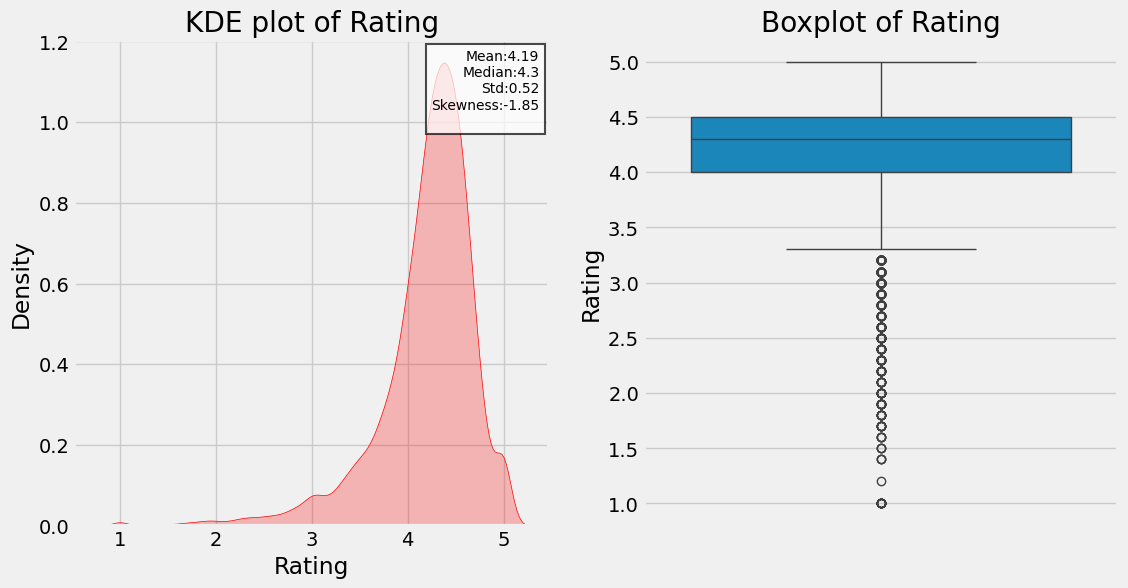

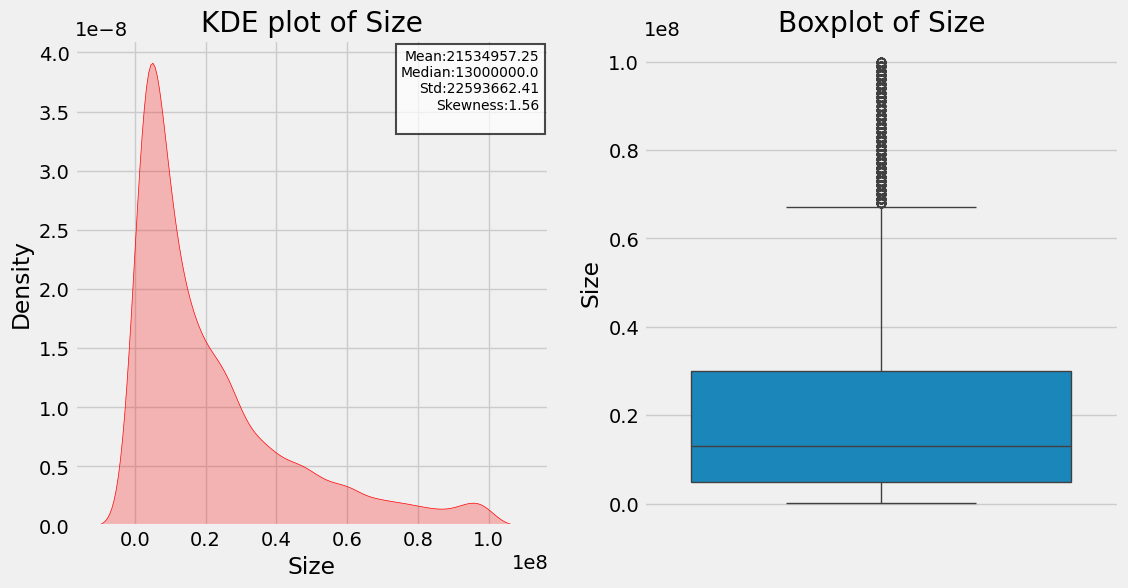

In [35]:
for cols in missing_cols2:
    plot_graph(cols)

Upon inspecting the features consisting of missing values `Rating` and `Size`, I conducted a distribution analysis.

1. **Rating:**
   - Distribution: The rating feature exhibits a left-sekwed distribution. This indicates that most of the apps rating is clustered towards the higher end of the scale, with a longer tail extending towards lower values.
   - Outliers: The distribution also contains of a significant numbers of outliers, likely representing usually low ratings realtive to the majority.
2. **Size:**
   - Distribution: The size feature is right-skewed with most of the apps having realtively smaller size, but there is long tail of apps which have much larger size.
   - Outliers: As with Rating, the Size feature consists of numerous outliers, particlarly at the upper end of the distribution. 

In [36]:
numerical_cols=[cols for cols in playstore.columns if playstore[cols].dtype in ['float64','int64'] and cols!='Rating']
numerical_cols

['Reviews', 'Size', 'Installs', 'Price']

In [37]:
categorical_cols=[cols for cols in playstore.columns if playstore[cols].dtype in ['object']]
categorical_cols

['App',
 'Category',
 'Type',
 'Content Rating',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [38]:
no_missing_rating=playstore[playstore['Rating'].notnull()]
has_missing_rating=playstore[playstore['Rating'].isnull()]

In [39]:
playstore[(playstore['Rating'].isnull()) & (playstore['Size'].isnull())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver
2485,OMD Protocols,MEDICAL,NaN,0,NaN,10,Free,0.00,Everyone,"July 27, 2018",1.0,Varies with device
3258,SD card backup,TOOLS,NaN,142,NaN,1000000,Free,0.00,Everyone,"March 27, 2017",Varies with device,Varies with device
4137,F-1 watchface by Delta,PERSONALIZATION,NaN,0,NaN,10,Paid,2.49,Everyone,"August 23, 2017",Varies with device,Varies with device
4218,D+H Reaction Wall,GAME,NaN,0,NaN,1,Paid,0.99,Everyone,"July 24, 2016",Varies with device,Varies with device
4504,Q Actions - Digital Assistant,PRODUCTIVITY,NaN,0,NaN,500,Free,0.00,Everyone,"July 20, 2018",Varies with device,Varies with device
5096,Elim AG,LIFESTYLE,NaN,7,NaN,100,Free,0.00,Everyone,"March 31, 2017",1.0,4.2 and up
5098,AG Subway Simulator Pro,FAMILY,NaN,0,NaN,1000,Free,0.00,Everyone,"July 27, 2018",Varies with device,Varies with device
5115,Alabama Ag Credit Ag Banking,FINANCE,NaN,0,NaN,100,Free,0.00,Everyone,"February 9, 2018",5.3.4,4.4 and up
5134,Woodland AH,MEDICAL,NaN,0,NaN,50,Free,0.00,Everyone,"February 2, 2018",300000.0.97,4.0.3 and up
5208,ai.Bot Box,PRODUCTIVITY,NaN,0,NaN,10000,Free,0.00,Everyone,"March 1, 2017",Varies with device,Varies with device


In [40]:
playstore_copy = playstore.dropna(subset=['Rating', 'Size'], how='all')

In [41]:
playstore_copy.shape

(10772, 12)

In [42]:
playstore_copy.isnull().mean()*100

App                0.000000
Category           0.000000
Rating            13.108058
Reviews            0.000000
Size              15.196807
Installs           0.000000
Type               0.000000
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
Current Ver        0.000000
Android Ver        0.000000
dtype: float64

In [43]:
imputer=KNNImputer()
cols=['Rating','Size']

In [44]:
playstore_copy[cols]=imputer.fit_transform(playstore_copy[cols])

C:\Users\khadk\AppData\Local\Temp\ipykernel_16652\2668307985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playstore_copy[cols]=imputer.fit_transform(playstore_copy[cols])


In [45]:
playstore_copy.isnull().mean()*100

App               0.0
Category          0.0
Rating            0.0
Reviews           0.0
Size              0.0
Installs          0.0
Type              0.0
Price             0.0
Content Rating    0.0
Last Updated      0.0
Current Ver       0.0
Android Ver       0.0
dtype: float64

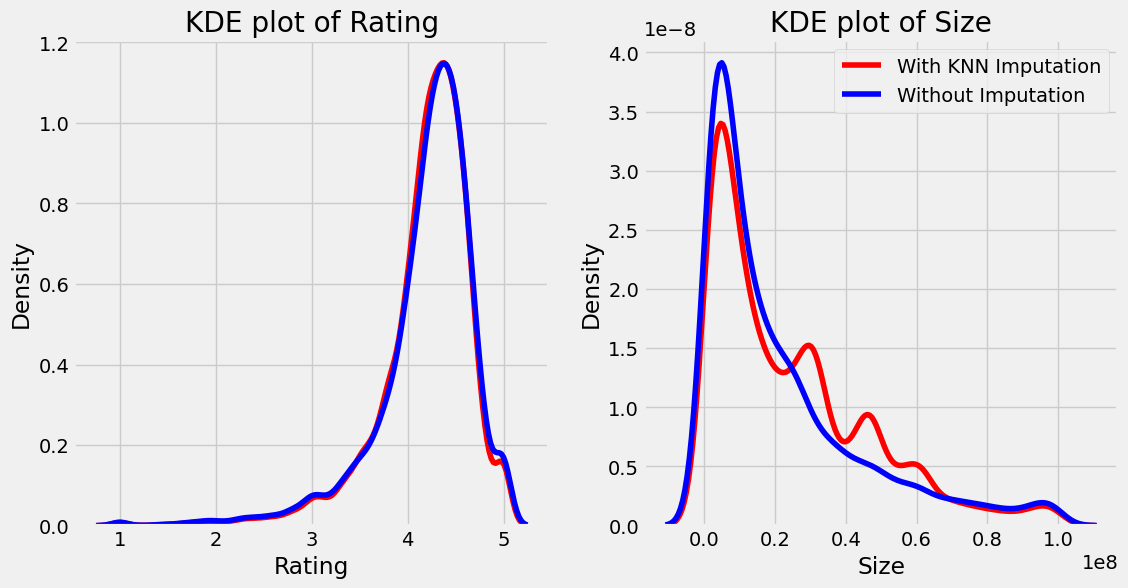

In [46]:
#KDE plot to analyze the distribution of Rating and Size before and after imputation:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))

sns.kdeplot(data=playstore_copy,x='Rating',color='red',ax=ax[0],label='With KNN Imputation')
sns.kdeplot(data=playstore,x='Rating',color='blue',ax=ax[0],label='Without Imputation')
ax[0].set_title("KDE plot of Rating")
ax[0].set_xlabel("Rating")
ax[0].set_ylabel("Density")

sns.kdeplot(data=playstore_copy,x='Size',color='red',ax=ax[1],label='With KNN Imputation')
sns.kdeplot(data=playstore,x='Size',color='blue',ax=ax[1],label='Without Imputation')
ax[1].set_title("KDE plot of Size")
ax[1].set_xlabel("Size")
ax[1].set_ylabel("Density")

plt.legend()
plt.show()

I have followed numerous strategies to deal with the null values to maximize data retention. For features like `Type`,`Current Ver`,`Android Ver` having missing values less than 5% I have removed all the observations assuming that the values were missing completely at random (MCAR). Moreover, for rows that have both `Rating` and `Size` missing, I have also removed them. Lastly, `Rating` and `Size` contains 15% and 13% missing values respectively and removing these observation is not an optimal approach. Thus, I have used **KNN Imputer** to impute the missing values for these columns. 

The distribution from the KDE plot above shows that KNN imputation has not affected the distribution of `Rating` which means that the original information for `Rating` is preserved. However, the distribution of Size has changed slightly. This suggests that the imputed values introduced minor changes

In [47]:
#Analyzing the changes in varaince after KNN imputation:
print("Rating")
print("Original Varaince is:",playstore['Rating'].var())
print("Varaince after KNN imputation is:",playstore_copy['Rating'].var())
print("-"*60)
print("Size")
print("Original Varaince is:",playstore['Size'].var())
print("Varaince after KNN imputation is:",playstore_copy['Size'].var())

Rating
Original Varaince is: 0.2654959283216576
Varaince after KNN imputation is: 0.24361205640029343
------------------------------------------------------------
Size
Original Varaince is: 510473581226796.25
Varaince after KNN imputation is: 503756555164622.75


The varaince of `Rating` decreased slightly after KNN imputation, but the change is raltively minor which indicates that the overall variability is preserved. 
The varaince of `Size` is extremely large which is expected given the wide range of app size. After KNN imputation, the variance decreased by a small margin realtive to the scale of the data.

#### Exploratory Data Analysis:

1) Most popular Category Overall:
Which is the most popular app category?

In [48]:
category_counts = playstore_copy['Category'].value_counts().to_dict()

In [49]:
wc=WordCloud(width=1000, height=600, min_font_size=10, background_color='black').generate_from_frequencies(category_counts)

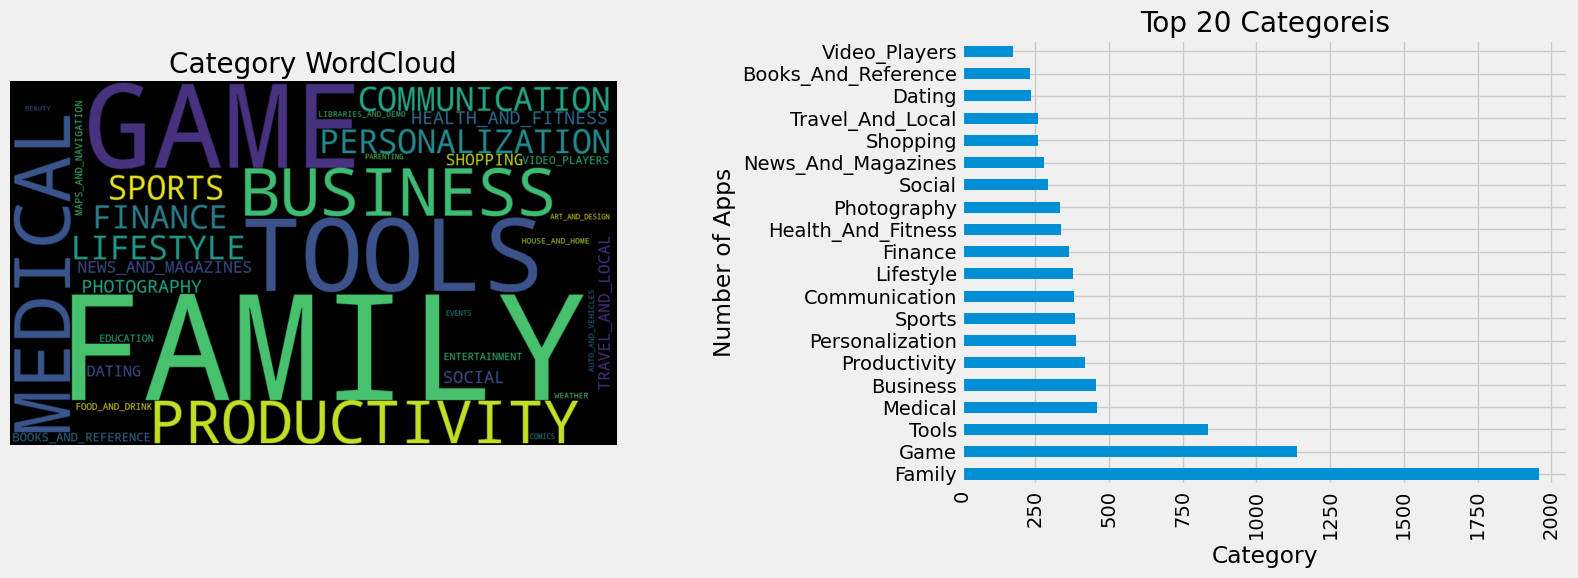

In [50]:
fig,ax=plt.subplots(1,2,figsize=(16,6))

#WordCloud on the left
ax[0].imshow(wc,interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Category WordCloud')

#Barplot in the right
playstore_copy['Category'].str.title().value_counts().head(20).plot(kind='barh',ax=ax[1])
ax[1].set_title("Top 20 Categoreis")
ax[1].set_ylabel("Number of Apps")
ax[1].set_xlabel("Category")
ax[1].tick_params(axis='x',rotation=90)


plt.tight_layout(w_pad=5)
plt.show()

**WordCloud:** It displays the frequency of app categories as a word cloud. Larger words indicate categories with more apps. `Family, Game, Tools, and Medical` are the most prominent, suggesting that these are the most common app categories. 

**Bar Chart:** It shows the top 20 app categories by the number of apps. `Family` leads by a significant margin, followed by `Game, Tools, and Medical`.The remaining categories have relatively fewer apps. `Video_Players and Books_And_Reference` are at the lower end.

In [51]:
#Filtering apps with 5 star rating:
full_rating=playstore_copy[playstore_copy['Rating']==5]

In [52]:
print(f"There are {full_rating.shape[0]} apps that have 5 star rating")

There are 274 apps that have 5 star rating


In [53]:
text2 = ' '.join(full_rating['Category'].str.title())

In [54]:
wc=WordCloud(width=1000, height=600, min_font_size=10, background_color='black').generate(text2)

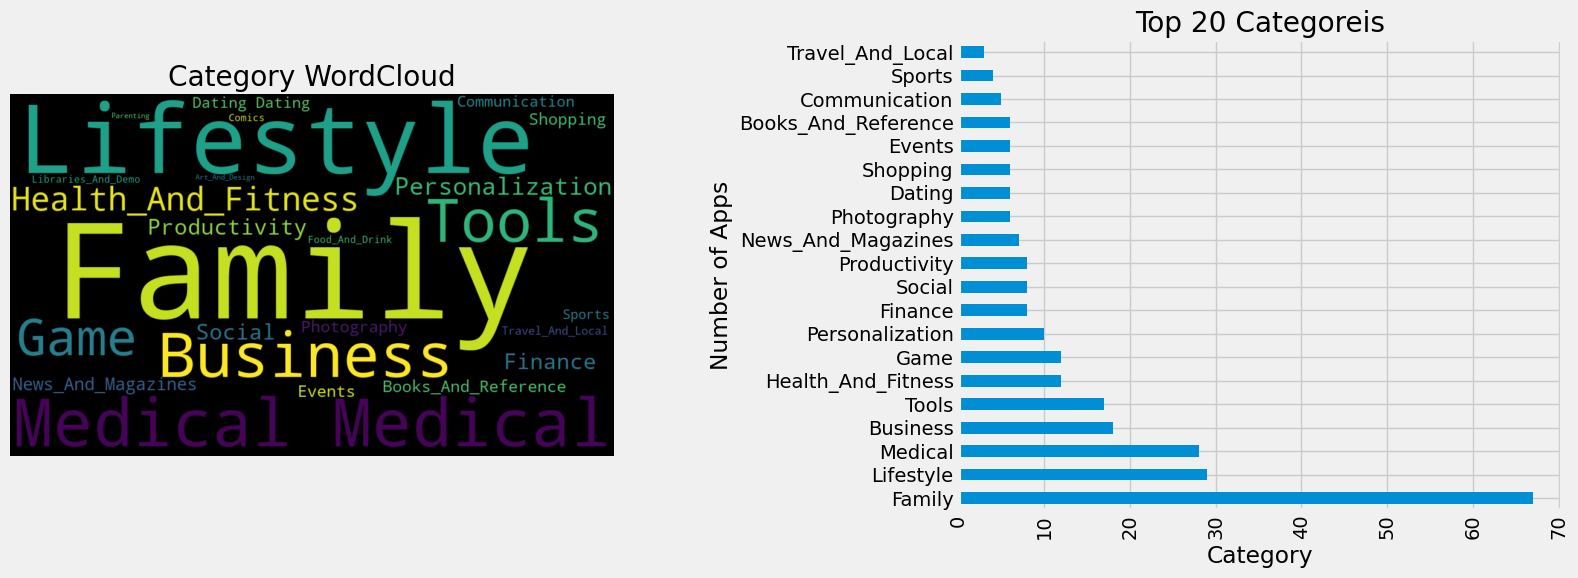

In [55]:
fig,ax=plt.subplots(1,2,figsize=(16,6))

#WordCloud on the left
ax[0].imshow(wc,interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title('Category WordCloud')

#Barplot in the right
full_rating['Category'].str.title().value_counts().head(20).plot(kind='barh',ax=ax[1])
ax[1].set_title("Top 20 Categoreis")
ax[1].set_ylabel("Number of Apps")
ax[1].set_xlabel("Category")
ax[1].tick_params(axis='x',rotation=90)


plt.tight_layout(w_pad=5)
plt.show()

Goal: To identify the most popular app categories that achieve a perfect 5-star rating.
**WordCloud:** `Family, Lifestyle, Medical` are the most prominent app categories indicating that these are among the most popular categories for app with top ratings. 
These categories may offer high-quality apps that consistently meet user expectations.

**Bar Chart:** `Family` is the category with the highest number of apps achieving a perfect 5-star rating.`Lifestyle and Medical` follow, but notably fewer apps(Lifestyle has fewer than 500 apps in this analysis).
`Family` apps may recieve a high rating due to their utility. Lifestyle apps, though less in number, are highly rated. This could be because users in this category such as those tracking daily health and fitness are more engaged and satisfied with the apps they use. 

2) How does the number of reviews relate to the app rating?

In [56]:
playstore_copy['Reviews'].describe()

count    1.077200e+04
mean     4.469543e+05
std      2.936775e+06
min      0.000000e+00
25%      3.900000e+01
50%      2.177000e+03
75%      5.578025e+04
max      7.815831e+07
Name: Reviews, dtype: float64

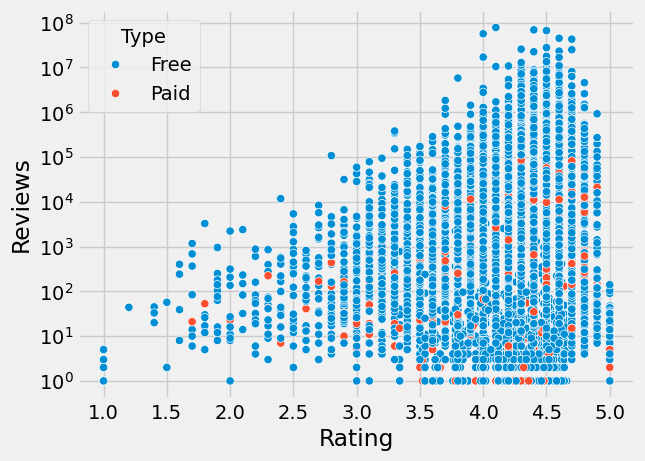

In [57]:
#Scatterplot of Reviews and Rating:
sns.scatterplot(data=playstore_copy,x='Rating',y='Reviews',hue='Type')
plt.yscale('log')

plt.show()

The **Scatter Plot** shows the realtionship between rating and reviews. Free apps dominate the plot, indicating that they are much more common than paid apps. The plot highlights the dominace and popularity of free apps in the Play Store.

Most apps, both paid and free, have rating between 3 and 5. Higher rating are densley populated.

Since the number of reviews varies widely, from a low scale as 0 to 10 million, shown on the logarithmic scale, apps with higher rating tends to have more reviews, especially among free apps. 